# Neural Networks: Theory and Implementation

Group Members:

Name: `Sayeh Jarollahi` \
Student ID (matriculation number): `7073520` \
Email: `saja00006@stud.uni-saarland.de` 

Name: `Mahsa Amani` \
Student ID (matriculation number): `7064006` \
Email: `maam00002@stud.uni-saarland.de`

## Exercise 1

In [4]:
import numpy as np

def random_data_generator(n=100):
    # Generating two clusters of 100 random X 
    cluster1 = np.random.randn(n, 2)  # Cluster 1
    cluster2 = np.random.randn(n, 2)  # Cluster 2

    # Shifting the mean of each cluster
    cluster1 += np.array([-2, -2])
    cluster2 += np.array([2, 2])

    # Assigning classes
    class1 = -np.ones((n, 1))  # Class -1 for cluster 1
    class2 = np.ones((n, 1))   # Class 1 for cluster 2 

    # Combining clusters and classes
    X = np.vstack((cluster1, cluster2))
    y = np.vstack((class1, class2))

    # Shuffling the clusters and classes
    indices = np.random.permutation(2 * n)
    X = X[indices]
    y = y[indices]

    return X, y

In [5]:
def xor_data_generator():
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

    # computing each point class as (x XOR y)
    y = np.logical_xor(X[:, 0], X[:, 1]).astype(int)
    # replacing 0 label with -1 label
    y = np.where(y == 0, -1, y)
    # reshaping for having a vertical array
    y = y.reshape(-1, 1)

    return X, y

In [6]:
import matplotlib.pyplot as plt

def cluster_visualization(X, y, title=""):
    # Separating points based on their classes
    X1 = X[y[:, 0] == 1] # for class == 1
    X2 = X[y[:, 0] == -1] # for class == -1

    # plot
    plt.plot(X1[:, 0], X1[:, 1], 'ro', label="Class 1")  # red for class 1
    plt.plot(X2[:, 0], X2[:, 1], 'bo', label="Class -1")  # blue for class -1
    plt.title(f'Cluster Visualization of {title} dataset')
    plt.legend()
    plt.show()

In [37]:
seed = 42
np.random.seed(seed)

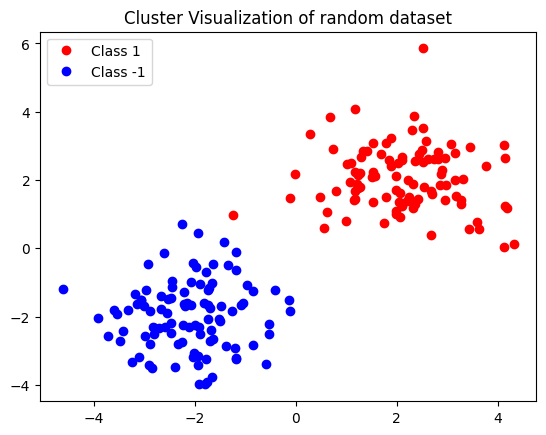

In [27]:
X, y = random_data_generator()
cluster_visualization(X, y, title="random")

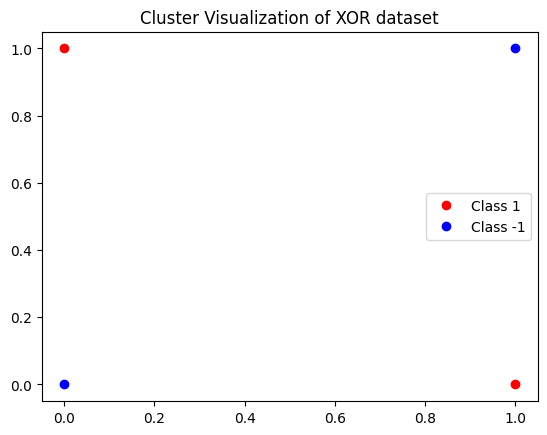

In [9]:
X, y = xor_data_generator()
cluster_visualization(X, y, title="XOR")

## Exercise 2

In [1]:
from sklearn.svm import LinearSVC

def linear_decision_boundary_finder(X, y, max_iter=1000, C=1.0):
    svm_model = LinearSVC(random_state=seed, max_iter=max_iter, C=C)

    # Fitting the model to the points and their classes
    svm_model.fit(X, y.flatten())

    # SVM model coefficients and intercept
    coef = svm_model.coef_[0]
    intercept = svm_model.intercept_[0]

    return coef, intercept


In [2]:
def decision_boundary_visualization(X, y, coef, intercept, title=""):
    # Separating points based on their classes
    X1 = X[y[:, 0] == 1] # for class == 1
    X2 = X[y[:, 0] == -1] # for class == -1

    # Plot the points
    plt.plot(X1[:, 0], X1[:, 1], 'ro', label="Class 1")  # red for class 1
    plt.plot(X2[:, 0], X2[:, 1], 'bo', label="Class -1")  # blue for class -1

    # Create a meshgrid to plot decision regions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    # Calculate class of each point in the meshgrid
    Z = coef[0] * xx + coef[1] * yy + intercept
    Z = np.sign(Z)  
    
    # Plot decision regions
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    plt.title(f'Decision Boundary Visualization of {title} dataset')
    plt.legend()
    plt.show()


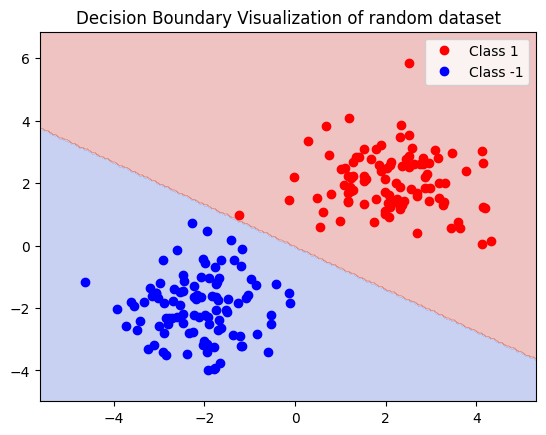

In [38]:
X, y = random_data_generator()
coef, intercept = linear_decision_boundary_finder(X, y)
decision_boundary_visualization(X, y, coef, intercept, "random")

This already performs good in seperating the 2 classes, so we optimize the model trained over XOR dataset.

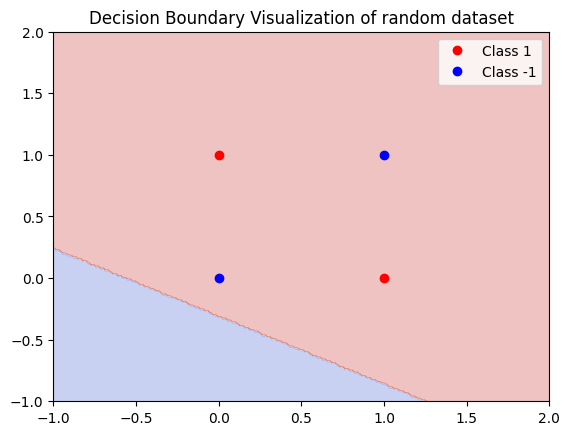

In [39]:
X, y = xor_data_generator()
coef, intercept = linear_decision_boundary_finder(X, y)
decision_boundary_visualization(X, y, coef, intercept, "random")

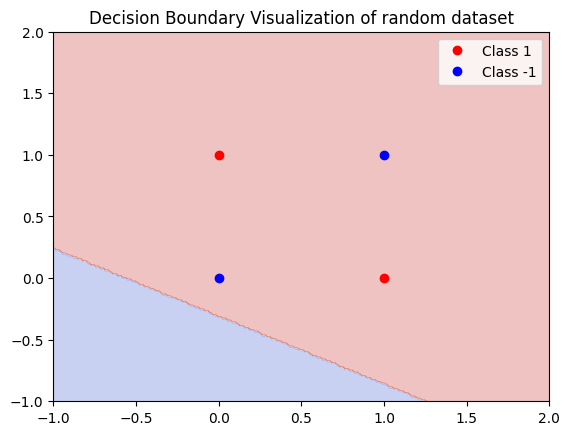

In [40]:
coef, intercept = linear_decision_boundary_finder(X, y, max_iter=10000)
decision_boundary_visualization(X, y, coef, intercept, "random")

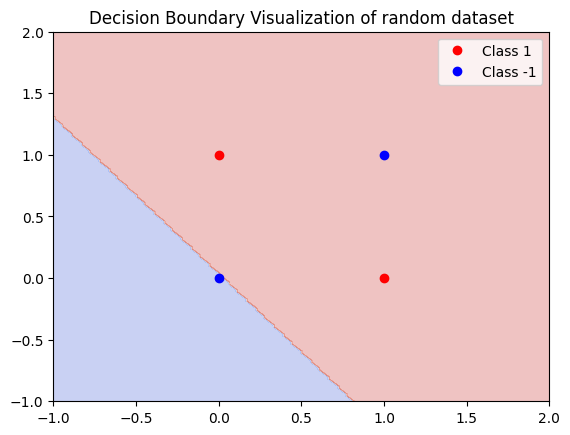

In [41]:
coef, intercept = linear_decision_boundary_finder(X, y, max_iter=10000, C=2.0)
decision_boundary_visualization(X, y, coef, intercept, "random")

As the data cannot be seperated by a line and there is no linear model capable of seperating these 4 points, so we stop trying out more settings.
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

## Exercise 3

1. As we can see in the visualizations, the model has found a decision boundry in the first section, but it did not found any decision boundry in the second second. As we mentioned earlier, in the first section, data could be linearly seperated. LinearSVC is a model that can find the optimal decision boundry for the datasets that are linearly seperable. Hence, this model worked for the first dataset. 
However, the visualization for the second section reveals that data is not seperable by a straight line. This means that a linear model is not sufficient for classification in this case.



2. No, there may be multiple possible decision boundries for a linealy-seperable dataset. We can consider that the maximum-margin is unique, but there might be many decision boundries for one linearly seperable dataset. 

3. As we can see in the following output, when we flip the label of some data etries, data is not linearly seperable anymore. Consequently, the LinearSVC will not perform perfectly. However, 8 elements are considered noises in the data and the LinearSVC model has classified most of the data corrrectly. Although the decision boundry did not classify all the data points, it has performed quite good. If data's noise were more, the decision boundry's accuracy would have been less. 

In [29]:
X, y = random_data_generator()

In [32]:
# flipping y of the chosen indices
indices = np.random.choice(y.shape[0], 8, replace=False)
y[indices] *= -1

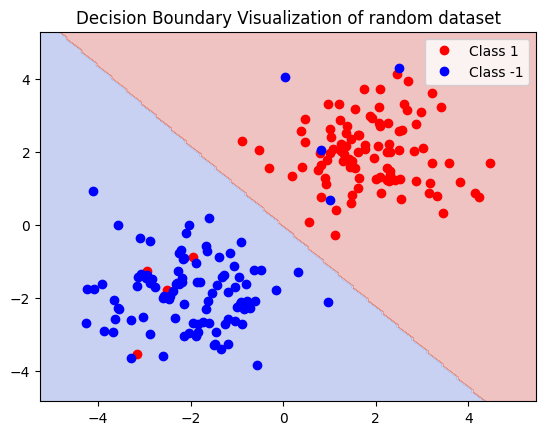

In [35]:
coef, intercept = linear_decision_boundary_finder(X, y)
decision_boundary_visualization(X, y, coef, intercept, "random")